As a gamer, I am, obviously, very interested in games of many sorts. And, yes, while this interest is mostly rooted in the playing of these games, there is also an underlying curiosity as to the statistics of all the games I play. So, using the opportunity supplied by my Back-End development class, I downloaded a dataset pretaining to these statistics, and set out to answer a few questions I had.

The table below is only a fraction of the dataset that I was bale to work with.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
data = pd.read_csv("games.csv")
data.head()


,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


Of the few questions I was able to form, based on this data, I was most curious about the ratings for each genre of game there was. So, naturally, I came up with the following question.

Question 1: What is the average rating of each genre of game?

Text(0.5, 1.0, 'Average Rating of Games Based on Genre')

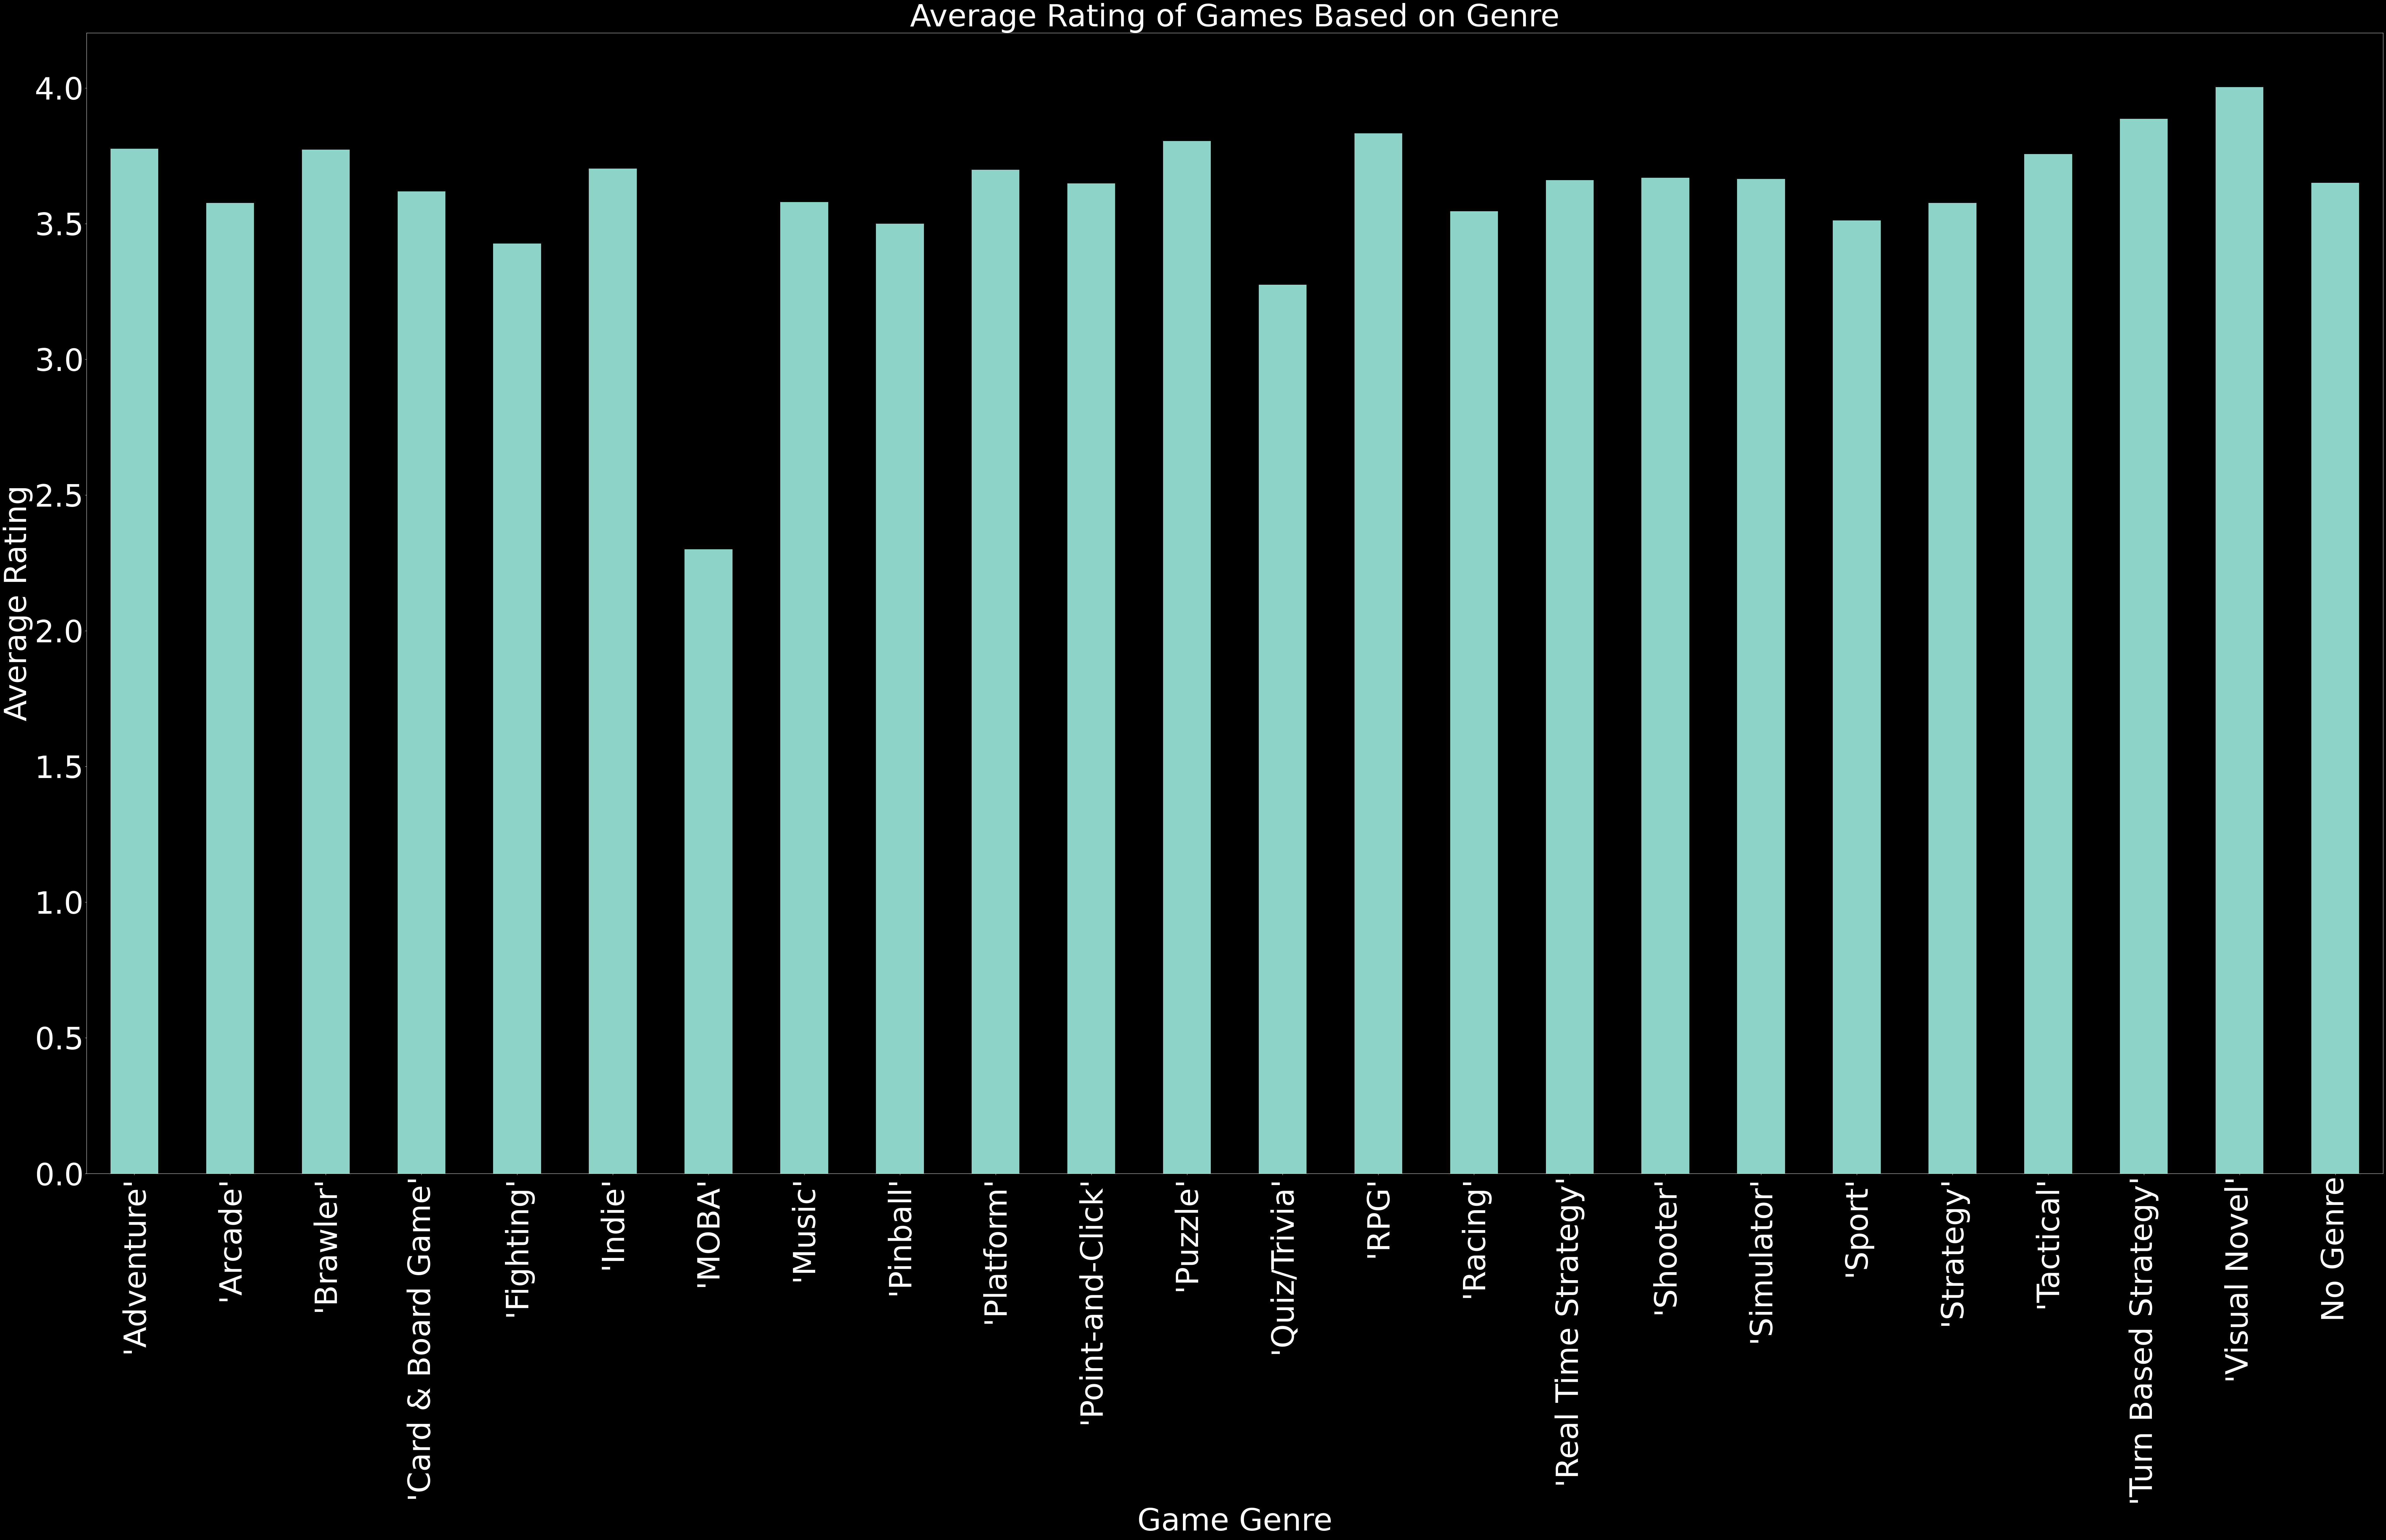

In [18]:

data['Genres'] = data['Genres'].str.strip('[]').str.split(',')
data['Plays'] = data['Plays'].str.replace('K', "000").astype(float)
genre_exploded = data.explode('Genres')
genre_exploded['Genres'] = genre_exploded['Genres'].str.strip()
genre_exploded['Genres'] = genre_exploded['Genres'].replace([''], 'No Genre')
correlation1 = genre_exploded.groupby(['Genres']).Rating.mean()
plt.rc('xtick', labelsize=75,) 
plt.rc('ytick', labelsize=75)   
plt.figure(figsize=(100,50))
correlation1.plot(kind='bar')
plt.xticks(rotation='vertical')
plt.ylabel ("Average Rating", fontsize = 75)
plt.xlabel ("Game Genre", fontsize = 75)
plt.title ("Average Rating of Games Based on Genre", fontsize = 75)



The graph above sufficiently shows that each genre, on average, is around a rating of 3.5 to 4. However, we can see a couple of outliers. We can see that the Quiz/Trivia genre is rated a bit below average, and then there is the MOBA genre, which is significantly below average.

This below average rating for the MOBA genre piqued my interest, causing me to look further into the data, as wrell as inspiring my next question.

Question 2: Is the MOBA genre overall just rated poorly, or are there a few outliers that drag the average rating down?

Text(0.5, 1.0, 'Rating of Each Individual MOBA Game')

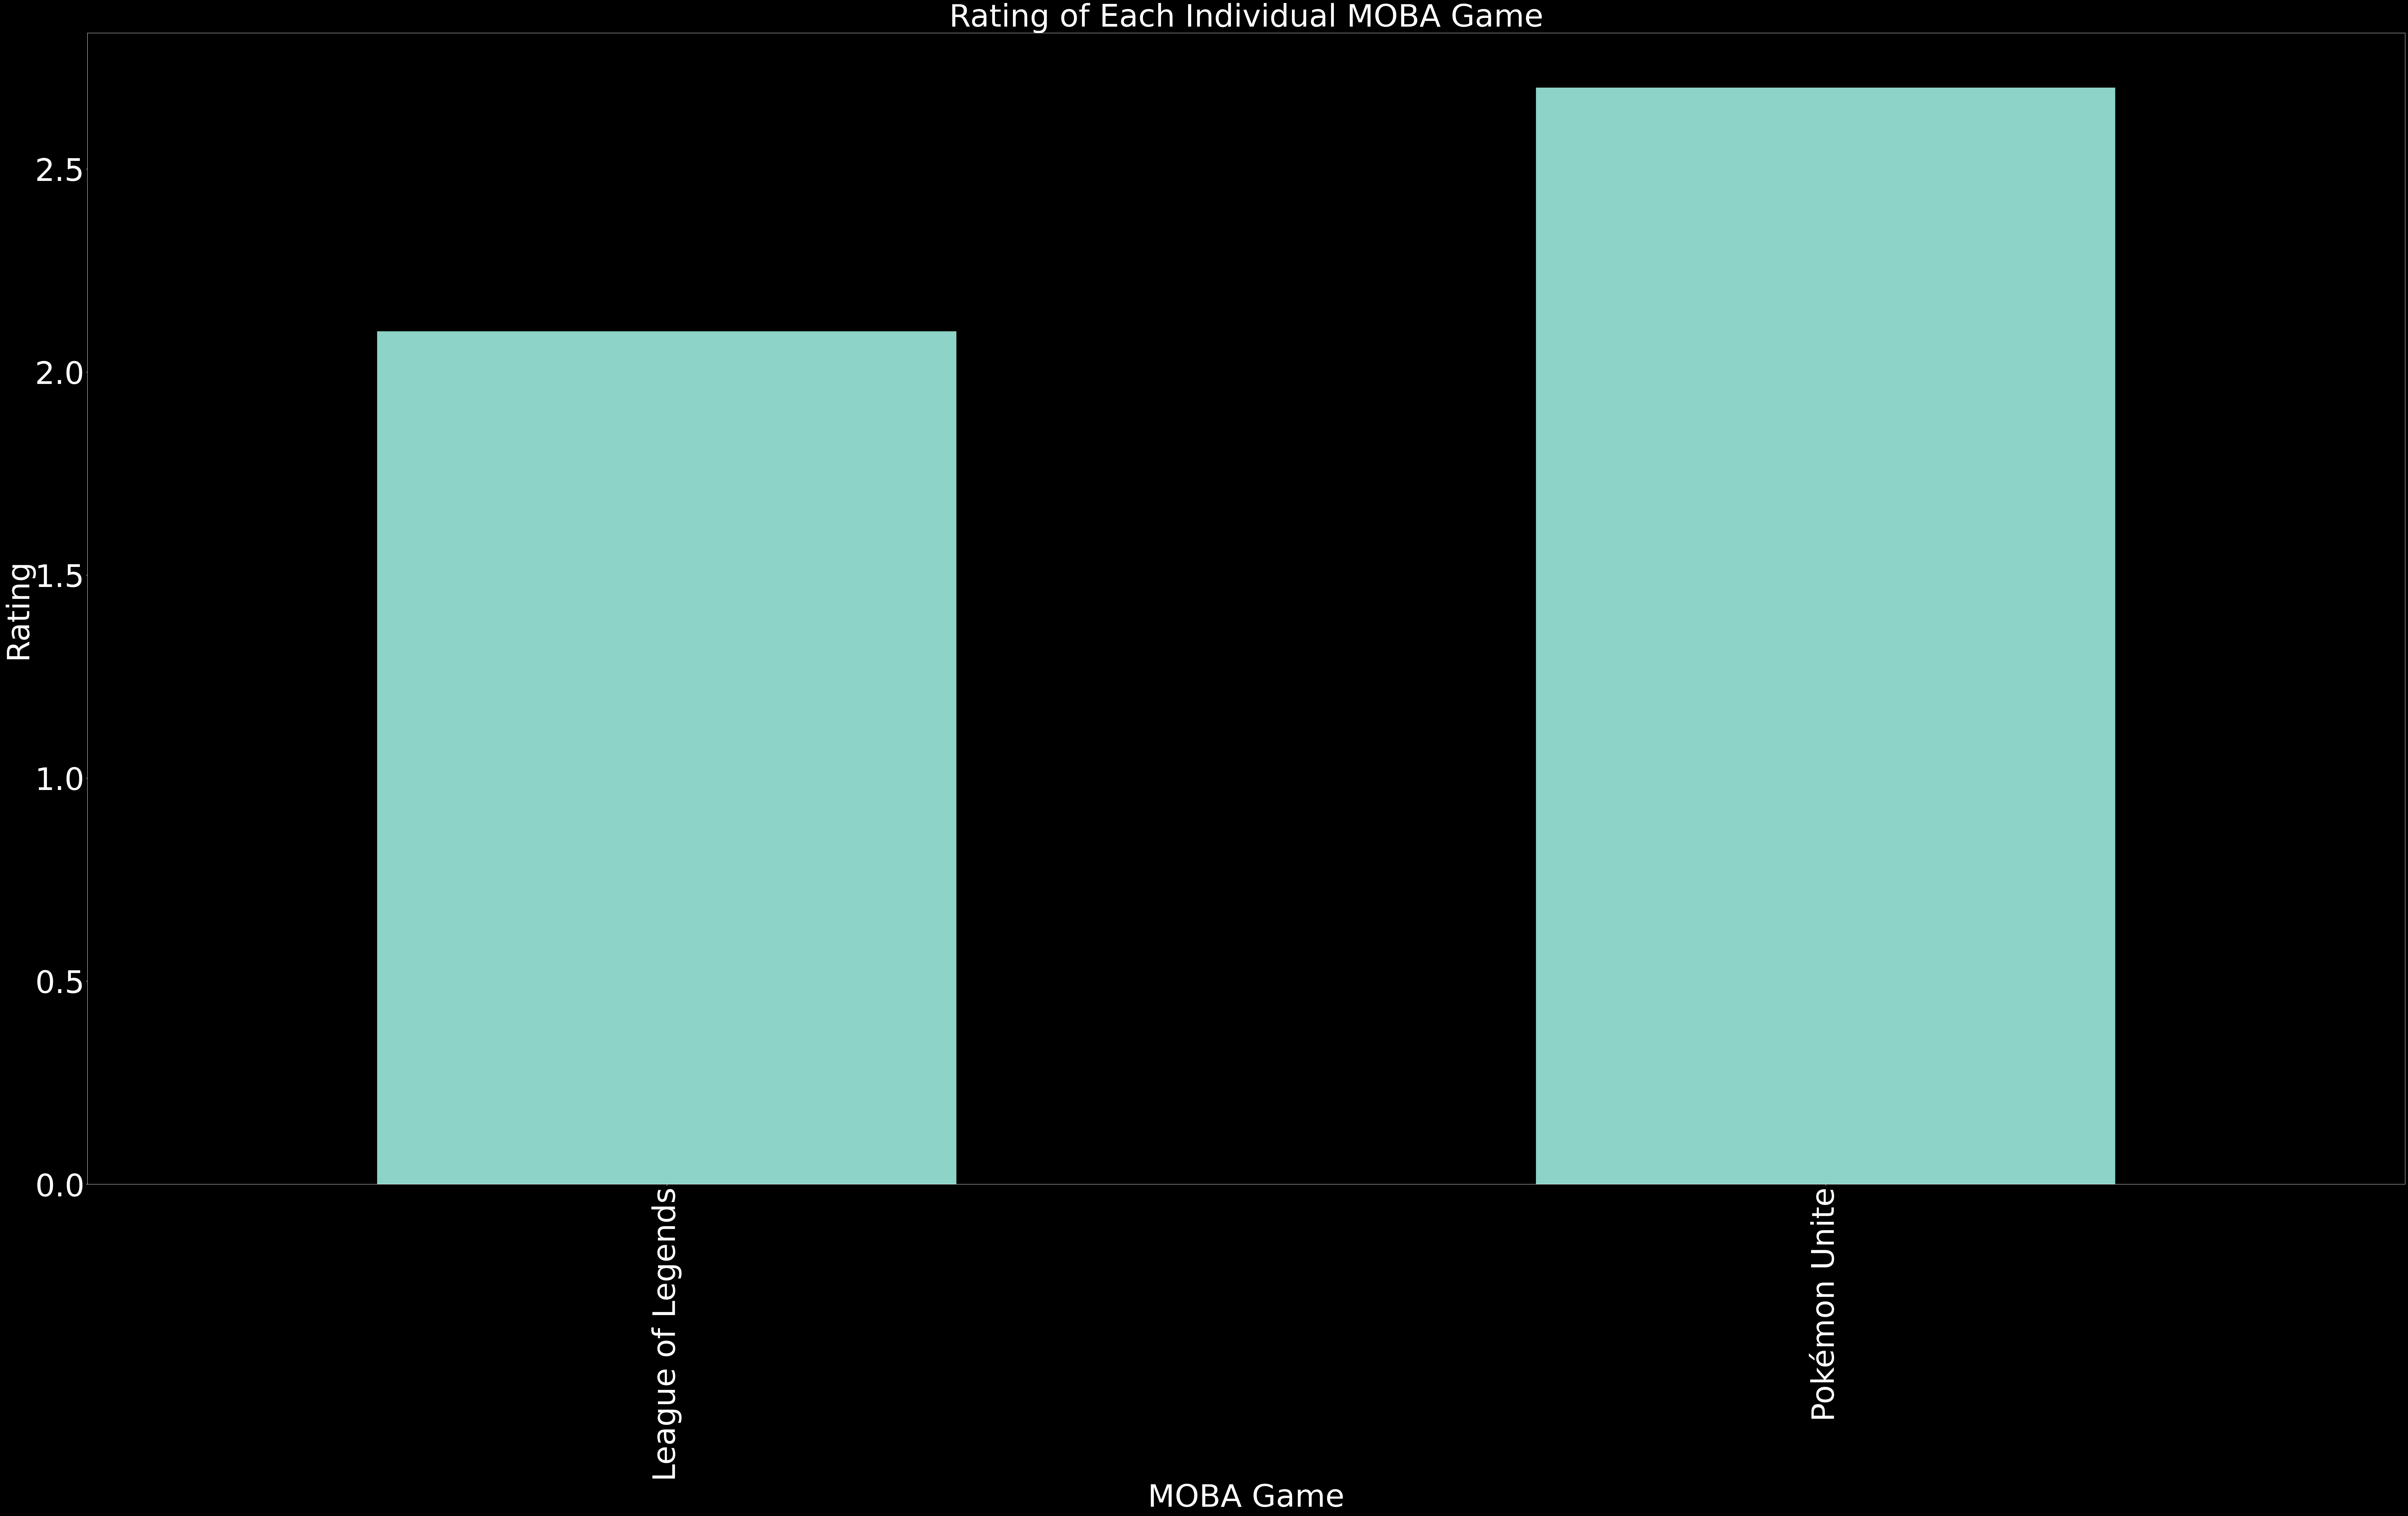

In [20]:
filtered = genre_exploded[genre_exploded.Genres == "'MOBA'"]
correlation3 = filtered.groupby('Title').Rating.max()
plt.rc('xtick', labelsize=75,) 
plt.rc('ytick', labelsize=75)   
plt.figure(figsize=(100,50))
correlation3.plot(kind='bar')
plt.ylabel ("Rating", fontsize = 75)
plt.xlabel ("MOBA Game", fontsize = 75)
plt.title ("Rating of Each Individual MOBA Game", fontsize = 75)

And once the graph is created, we can see why it is rated so poorly.

First off, there are only 2 games to represent the MOBA genre, them being 'League of Legends' and 'Pokemon Unite'. Both of these games, as one could probably imagine just from heaing people talk about the games, are rated pretty badly. One has a rating of about 2, and the other has a rating of about 2.5. This makes it pretty obvious as to why the average rating for the Genre is so low.

Now, moving away from the ratings, I was curious as to the amount of plays each genre has, so I came up with the following question.

Question 3: How many plays does each genre have in total?

Text(0.5, 1.0, 'Number of Plays of Games Based on Genre')

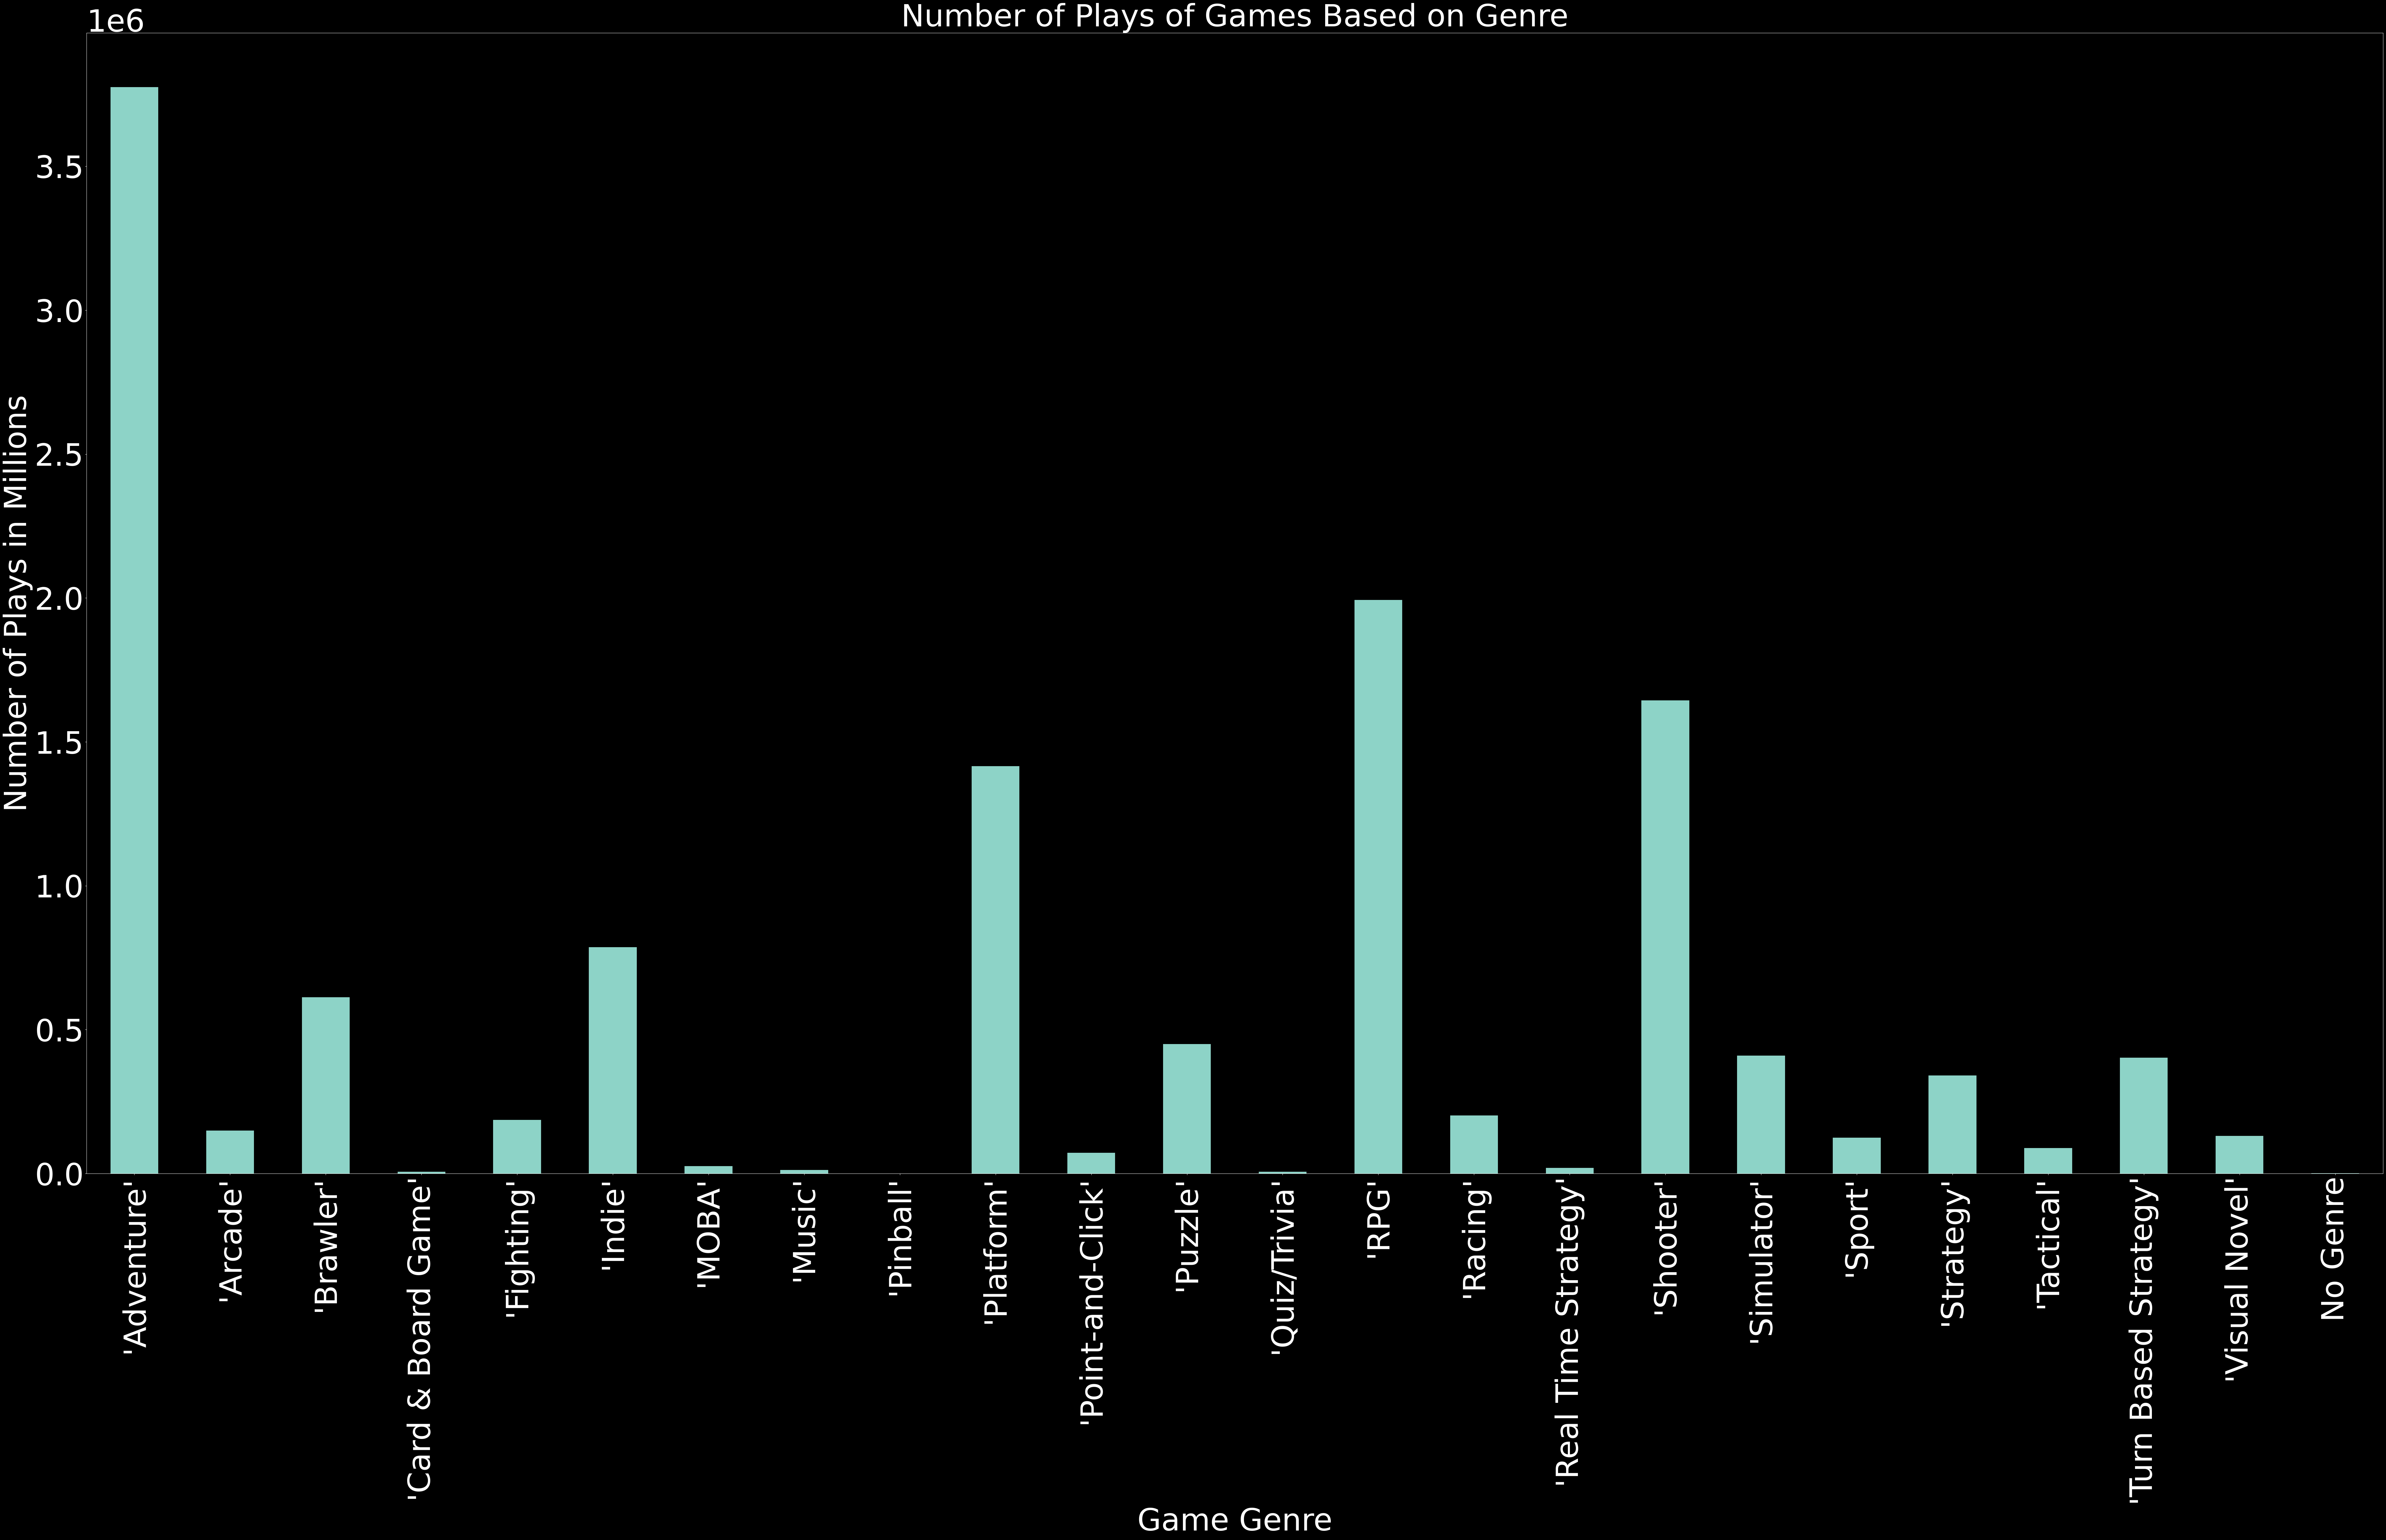

In [19]:
correlation2 = genre_exploded.groupby(['Genres']).Plays.sum()
plt.rc('xtick', labelsize=75,) 
plt.rc('ytick', labelsize=75)   
plt.figure(figsize=(100,50))
correlation2.plot(kind='bar')
plt.xticks(rotation='vertical')
plt.ylabel ("Number of Plays in Millions", fontsize = 75)
plt.xlabel ("Game Genre", fontsize = 75)
plt.title ("Number of Plays of Games Based on Genre", fontsize = 75)

Here, we can see a lot of revealing information.

As we can immediately notice, the Adventure genre has a huge amount of plays, compared to all of the other genres, reaching about 3.7 million in total. Then of course, we notice the genres with almost no plays, such as pinball and card/board games. We also see MOBA among the lower played genres, as one could probably infer from the previous graphs. But thios graph produced one main question.

Question 4: What games fall under the Adventure genre so that it has so many more total plays compare to all other genres?

In [21]:
filtered2 = genre_exploded[genre_exploded.Genres == "'Adventure'"]
filtered3 = filtered2[filtered2.Plays > 17500]
correlation4 = filtered3.groupby('Title').Plays.max()
plt.rc('xtick', labelsize=75,)
plt.rc('ytick', labelsize=75)
plt.figure(figsize=(100,50))
correlation4.plot(kind='bar')
plt.ylabel ("Number of Plays", fontsize = 75)
plt.xlabel ("Adventure Game", fontsize = 75)
plt.title ("Number of Plays of the Most Popular Adventure Games", fontsize = 75)

Text(0.5, 1.0, 'Number of Plays of the Most Popular Adventure Games')

If you havent been living under a rock for your entire life, you have, almost certainly, herad of at least ONE of  these extremely popular games. Someone who has heard of all of them, however, would not be suprised as to why the Adventure genre has so many more total plays. We see games such as Minecraft, Portal 2, and Grand Theft Auto 5. These three games alone have been on the scene for years, each sporting millions upon millions of fans alone. After seeing this, it really is no wonder as to why the plays of the Adventure genre is so high in number.

Now that I've had the opportunity to dig through this dataset, and see the statistics of the games I love to play on a daily basis, I can safely say that my curiosity has been sated. I hope that whoever looks upon this compilation of data, and graphs formed off of them, is also able to satisfy their curiosity.